In [1]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt
import numpy             as np

from   astropy.table     import Table

In [2]:
sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/DESI/')

In [3]:
import pubplot

from   schechter     import schechter, named_schechter
from   findfile      import findfile, fetch_header

In [4]:
version = 'GAMA4'
survey  = 'gama'
dryrun  =  False

In [5]:
fpath = findfile(ftype='gold', dryrun=dryrun, version=version, survey=survey)
fpath

'/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold.fits'

In [6]:
gold = Table.read(fpath)
gold.meta

OrderedDict([('AREA', 180.0),
             ('GOLD_NGAL', 121975),
             ('IMMUTABLE', 'FALSE'),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0)])

##  VMAX

In [7]:
fpath = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
vmax  = Table.read(fpath)
vmax.sort('MCOLOR_0P0')
vmax

ZMAX,ZMIN,RA,DEC,ZSURV,FILLFACTOR,FIELD,IN_D8LUMFN,MCOLOR_0P0,MALL_0P0,VZ,VMAX,FILLFACTOR_VMAX
,,deg,deg,,,,,mag,mag,,,
float64,float64,float64,float64,float32,float64,bytes3,int64,float64,float64,float64,float64,float64
0.2715100049972534,0.039663288528705265,179.0450651,-0.35024037,0.2563,1.0,G12,0,-23.461170534036924,-23.417599538706114,4988771.027606055,5875467.512993152,0.7068891074027949
0.2715100049972534,0.03933423422922606,182.1835035,-2.07231294,0.10734,0.9316159364359198,G12,0,-23.442632031321555,-23.424384233236342,383585.3029794814,5875477.459299331,0.7068277252437339
0.2715100049972534,0.0339096951732739,213.78496641,-0.49323659,0.13893,1.0,G15,0,-23.107939332154334,-23.084321237531245,845476.0306159477,5875661.861370013,0.7059607371476206
0.2715100049972534,0.03350598251431382,178.51993046,0.60517927,0.22878,1.0,G12,0,-23.082316886159298,-23.04342428919923,3609792.362603803,5875671.490270573,0.705905875411497
0.2715100049972534,0.03294944890178139,180.52796941,-0.24151196,0.24896,1.0,G12,0,-23.045208950883637,-23.002885748988877,4594763.401207476,5875670.818130875,0.7058307402117311
0.2715100049972534,0.03247041721586893,184.98709908,-0.85050901,0.20644,1.0,G12,0,-23.010391635049515,-22.975296822537118,2687975.3729321975,5875655.482235701,0.7057662807353843
0.2715100049972534,0.03194881372599459,222.36929583,-1.27151016,0.20233,0.9979434474259146,G15,0,-22.976202885033608,-22.94180678796959,2536930.1314334297,5875670.580733907,0.7057019681287673
0.2715100049972534,0.031541209667382365,179.83440251,-1.64817036,0.08135,0.9369780902242146,G12,0,-22.94904753859117,-22.93521803910806,167754.5871742479,5875685.007485165,0.7056534973951007


##  LUMFN

In [8]:
fpath = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
lumfn = Table.read(fpath)
lumfn = lumfn[lumfn['N'] > 5.]
lumfn

MEDIAN_M,MEAN_M,MID_M,IVMAXMEAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-22.831925312129783,-22.864672608757225,-22.7,-22.864672846948825,4.908450103523929e-06,1.7353991766587908e-06,6.807683039529099e-06,2.4068794207278818e-06,8.0,0.7210177510903818
-22.704044909575536,-22.698038847342218,-22.5,-22.698039103486725,3.190492567290554e-05,4.424417132828013e-06,4.4249604347294826e-05,6.136316053647418e-06,52.0,0.721020720440997
-22.46463274592758,-22.48108373846114,-22.299999999999997,-22.481083659631633,5.5833619927584695e-05,5.8529537149381755e-06,7.743638269803898e-05,8.117538579317302e-06,91.0,0.7210259339267379
-22.284524826240034,-22.290306198711036,-22.099999999999998,-22.290306339943715,0.00011473502116987185,8.390255706316985e-06,0.00015912611022395477,1.1636453636587745e-05,187.0,0.7210330233374752
-22.09683320928304,-22.09645970260883,-21.9,-22.09645979429541,0.00022701581728798174,1.1801990361104154e-05,0.0003148477530928903,1.636815527487585e-05,370.0,0.721033859495996
-21.885819187202795,-21.890524649514894,-21.7,-21.890525468252765,0.00039758445838543826,1.5618592589929115e-05,0.0005513978970344479,2.1660955120500223e-05,648.0,0.7210463360654576
-21.68767578779024,-21.691111193907943,-21.5,-21.691111198123572,0.0006442340760875158,1.9881495220007374e-05,0.0008934387683987182,2.757211898998973e-05,1050.0,0.7210724731344396
-21.490264713562876,-21.493198474116287,-21.299999999999997,-21.493198474116287,0.0010565438847835258,2.546073678392691e-05,0.0014652395205031487,3.5309539238478065e-05,1722.0,0.7210724731344396
-21.289397454101135,-21.293651059135694,-21.099999999999998,--,0.0014209963049701775,2.9527295550553703e-05,--,--,2316.0,--


In [14]:
ddp1_full8frac = fetch_header(fpath=findfile(ftype='randoms_bd_ddp_n8', dryrun=False, field='GALL', prefix='randoms_ddp1'), name='DDP1_FULL8FRAC')
ddp1_full8frac

0.7005882538475274

Text(0.5, 1.0, 'GAMA')

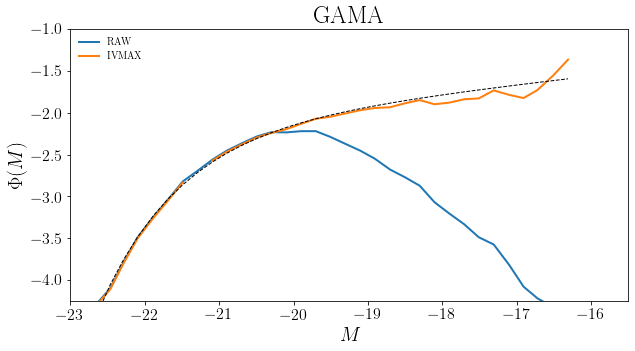

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))

pl.sca(ax)

pl.plot(lumfn['MEDIAN_M'],    np.log10(lumfn['PHI_N'] / ddp1_full8frac), label='RAW', lw=2.)
pl.plot(lumfn['MEDIAN_M'],    np.log10(lumfn['PHI_IVMAX']),    label='IVMAX', lw=2.)
pl.plot(lumfn['MEDIAN_M'],    np.log10(named_schechter(lumfn['MEDIAN_M'], 'TMR')), linestyle='--', c='k', lw=1.)

# pl.scatter(lumfn_tmr['Ms'], lumfn_tmr['PHI_STEP'], s=0.5)
# pl.plot(lumfn_tmr['Ms'], lumfn_tmr['PHI_STEP'], label='TMR_SWML', lw=1.)

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)
pl.title(survey.upper())

In [16]:
fpath = findfile(ftype='ddp_n8', dryrun=dryrun, version=version, survey=survey)
ddp   = Table.read(fpath)
ddp   = ddp[(ddp['MCOLOR_0P0'] > -17.5) & (ddp['FILLFACTOR'] > 0.9)]
ddp.sort('ZGAMA')
ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],RAND_N8,FILLFACTOR,BOUND_DIST,rRANDSEP,rRANDMATCH,rBOUND_DIST,rFILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,float64,int64
278617,587726031690989899,132.74706519,0.81545433,19.182756,0.0449,4,G09_Y2_012_182,6,20.366165,19.372587,19.172089,19.035418,18.949251,0.0449,139.45130555881028,35.722112922674484,G9,0,0,-90.57787706395119,97.99666511930467,1.89937286358174,89.89438709967055,-98.62586826519342,1.800855936386617,0.20049858,19.182756,0.22471829259057355,0,2,-0.1118172112236913,-0.13603692288164768,0.052681761487007414,0.013493432529692567,0.23968690988993202,2.12,-0.043553002,-0.09518799,-16.548485258032628,-16.496850268353768,-16.592038260211297,35.73124168198282,35.77479468416149,35.67960669230396,-0.15538421315581485,-0.20608063982425123,0.06134066520638626,0.05909464988941204,-16.557144161752007,0.6172428,0.05965957861940685,0.0,-7.1827564,0.0016675576772754352,0.0,101040.21792999028,0 .. 0,1 .. 1,7729.0,0.9009584049941471,5.11122250000175,0.19756740191885158,2490561,4.927176919172937,0.8885924235222281,4,7,19,-0.6606866454747917,1
78180,587722983366394701,215.9447985,0.02364557,19.66574,0.04662,4,G15_Y6_075_302,5,21.054993,19.884249,19.565754,19.248247,19.15994,0.04662,144.98328937499377,35.80658974391799,G15,0,0,-112.14765950848437,-81.31507616189805,0.057168402616653985,112.71192552555893,80.53111109293992,-0.0663560842423554,0.3184948,19.66574,0.35062900070955305,0,3,-0.12346369782660625,-0.1555979017836609,0.05173116328922951,0.026604286233009145,0.34362167380915004,2.12,-0.045221403,-0.098834395,-16.14736044451782,-16.093747452350346,-16.192581847758976,35.813099503966065,35.85832090720722,35.75948651179859,-0.15341826112596105,-0.20335180759594895,0.06330661723624006,0.06182348211771432,-16.15893589846483,0.13426018,0.049578496462859424,0.0,-7.665739,0.0013854812839479852,0.0,58330.718305073766,0 .. 0,1 .. 1,7846.0,0.9145969265861145,4.911304230854167,0.5958107225319964,502325,5.254005815828465,0.9133243864660662,1,10,15,-0.9164366263979947,0
54214,587722982812549325,177.09954495,-0.26436877,18.322176,0.04676,4,2dF291424,6,19.911781,18.66606,18.300789,18.094685,17.845188,0.04676,145.43416805624597,35.81333225458978,G12,0,0,-138.75799549286265,7.030281677179068,-0.6410698095235361,138.704815275611,-7.9976487688025255,-0.7930811357966554,0.3652706,18.322176,0.4001443838388503,0,3,-0.12916768494913566,-0.16404145416378046,0.053746094786930654,0.03301615198216351,0.3860005574287906,2.12,-0.0453572,-0.0991312,-17.499545168514047,-17.445771173025165,-17.544902369762454,35.821721148128304,35.86707834937671,35.76794715263942,-0.1532593615765124,-0.20312825673985896,0.06346551678568871,0.06204703297380432,-17.50926459051280

##  Cobaya

In [ ]:
# root = '/cosma/home/durham/{}/data/GAMA4/cobaya/'.format(os.environ['USER'])

In [ ]:
# dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

In [ ]:
# samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [ ]:
# samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

In [ ]:
# tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [ ]:
# g = plots.get_subplot_plotter()

In [ ]:
# g.triangle_plot([samples], filled=True)        

# Done.